# SVM for classification, without and with kernels

In this notebook we are going to explore the use of Support Vector Machines (SVMs) for image classification. We are going to use the famous MNIST dataset, that is a dataset of handwritten digits. We get the data from mldata.org, that is a public repository for machine learning data.

The dataset consists of 70,000 images of handwritten digits (i.e., 0, 1, ... 9). Each image is 28 pixels by 28 pixels and we can think of it as a vector of 28x28 = 784 numbers. Each number is an integer between 0 and 255. For each image we have the corresponding label (i.e., 0, 1, ..., 9).

In [22]:
#load the required packages

%matplotlib inline  

import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml

In [23]:
#fix your ID ("numero di matricola") and the seed for random generator
ID = 2076735
np.random.seed(ID)

Now let's load the dataset. 'data' contains the input, 'target' contains the label. We normalize the data by dividing each value by 255 so that each value is in [0,1]

In [24]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
mnist = fetch_openml('mnist_784', version=1)
# rescale the data
X, y = mnist.data.values / 255., mnist.target.values

Now split into training and test. We keep 500 samples in the training set. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

**IMPORTANT**: if you cannot run the SVM with 500 samples or 1000 samples (see below), try with a smaller number of samples (e.g. 200 here and 400 below).

In [25]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts = True)

Labels and frequencies in training dataset: 


(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([53, 52, 44, 54, 40, 47, 44, 55, 58, 53], dtype=int64))

We now provide a function to print an image in the dataset and the corresponding true label given the index of the image in the dataset.

In [26]:
#function for plotting a digit and printing the corresponding labe
def plot_digit(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %s" % labels[index])
    return

As an example, let's print the 100-th image in X_train and the 40,000-th image in X_test and their true labels.

INPUT:


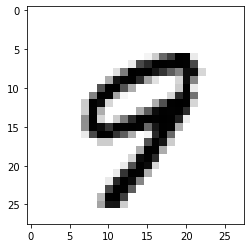

LABEL: 9
INPUT:


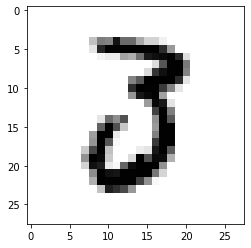

LABEL: 3


In [27]:
#let's try the plotting function
plot_digit(X_train,y_train,100)
plot_digit(X_test,y_test,40000)

## TO DO 1
Run SVM with 5-fold cross validation to pick the best kernel and values of parameters. We provide some potential choice for parameters, but change the grid if needed (e.g., it takes too long). For the SVM for classification use SVC from sklearn.svm; for the grid search we suggest you use GridSearchCV from sklearn.model_selection, but you can implement your own cross-validation for model selection if you prefer.

Finally, print the best parameters used as well as the score obtained by the best model

In [28]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [1, 10, 100]}

#run linear SVM
linear_SVM = SVC(kernel='linear')

#find best model using 5-fold CV
#and train it using all the training data

#Using GridSearchCV:
#model = GridSearchCV(estimator=linear_SVM, param_grid=parameters, cv=5)
#model.fit(X_train, y_train)

#Using my own Cross Validation function:
from sklearn.model_selection import KFold
num_folds = 5
kf = KFold(n_splits=num_folds)

#Create an array for storing the scores obtained by using each parameter
scores = np.zeros(len(parameters['C']),)

#For each parameter
for i in range (0, len(parameters['C'])):
    linear_SVM.set_params(C=parameters['C'][i]) #Set the current parameter C to the SVM
    for train_index, valid_index in kf.split(X_train): #Split the training data into 5 folds: 4 will be used as training data and 1 for validation purposes
        linear_SVM.fit(X_train[train_index], y_train[train_index]) #This overwrites previous fitting of the data
        scores[i] += linear_SVM.score(X_train[valid_index],y_train[valid_index]) #Add the score obtained for each fold

    scores[i] = scores[i] / num_folds #loss of parameter p is the average of all the losses obtained by using each fold of the training set as validation

best_parameter_index = np.argmax(scores)  #Get the index of the parameter with lower loss
best_parameter = parameters['C'][best_parameter_index]  #Get the actual parameter
best_loss = scores[best_parameter_index]

linear_SVM.fit(X_train,y_train)

print ('RESULTS FOR LINEAR KERNEL\n')

print("Best parameters set found:")
print(best_parameter)
#print(model.best_params_)

print("Score with best parameters:")
print(scores[best_parameter_index])
#print(model.best_score_)

print("\nAll scores on the grid:")
#print(model.cv_results_['mean_test_score'])
print(scores)

# parameters for poly with degree 2 kernel
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with poly of degree 2 kernel
poly2_SVM = SVC(kernel='poly',degree=2)

# ADD CODE: DO THE SAME AS ABOVE FOR POLYNOMIAL KERNEL WITH DEGREE=2
#find best model using 5-fold CV
#and train it using all the training data

#Using now GridSearchCV to see a different (and more compact) approach
grid_poly2 = GridSearchCV(estimator=poly2_SVM, param_grid=parameters, cv=5)
grid_poly2.fit(X_train, y_train)

print ('\nRESULTS FOR POLY DEGREE=2 KERNEL\n')

print("Best parameters set found:")
print(grid_poly2.best_params_)

print("Score with best parameters:")
print(grid_poly2.best_score_)

print("\nAll scores on the grid:")
print(grid_poly2.cv_results_['mean_test_score'])

# parameters for rbf SVM
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with rbf kernel
rbf_SVM = SVC(kernel='rbf')
# ADD CODE: DO THE SAME AS ABOVE FOR RBF KERNEL
#find best model using 5-fold CV
#and train it using all the training data

grid_rbf = GridSearchCV(estimator=rbf_SVM, param_grid=parameters, cv=5)
grid_rbf.fit(X_train, y_train)

print ('\nRESULTS FOR rbf KERNEL\n')

print("Best parameters set found:")
print(grid_rbf.best_params_)

print("Score with best parameters:")
print(grid_rbf.best_score_)

print("\nAll scores on the grid:")
print(grid_rbf.cv_results_['mean_test_score'])

RESULTS FOR LINEAR KERNEL

Best parameters set found:
1
Score with best parameters:
0.8640000000000001

All scores on the grid:
[0.864 0.864 0.864]

RESULTS FOR POLY DEGREE=2 KERNEL

Best parameters set found:
{'C': 1, 'gamma': 0.1}
Score with best parameters:
0.858

All scores on the grid:
[0.832 0.858 0.858 0.858 0.858 0.858 0.858 0.858 0.858]

RESULTS FOR rbf KERNEL

Best parameters set found:
{'C': 10, 'gamma': 0.01}
Score with best parameters:
0.8800000000000001

All scores on the grid:
[0.866 0.47  0.116 0.88  0.5   0.12  0.88  0.5   0.12 ]


## TO DO 2
For the "best" SVM kernel and choice of parameters from above, train the model on the entire training set and measure the training error. Also make predictions on the test set and measure the test error. Print the training and the test error.

In [29]:
#get training and test error for the best SVM model from CV
best_SVM = rbf_SVM

# fit the model on the entire training set
# ADD CODE
best_SVM.fit(X_train, y_train)

#get the training and test error
training_error_best = 1. - best_SVM.score(X_train,y_train)
test_error_best = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error_best)
print ("Best SVM test error: %f" % test_error_best)

Best SVM training error: 0.014000
Best SVM test error: 0.117381


## Use logistic regression for comparison

## TO DO 3

Just for comparison let's also use logistic regression, first with the default values of the parameter for regularization and then with cross-validation to fix the value of the parameters. For cross validation, use 5-fold cross validation and the default values of the regularization parameters for the function linear_model.LogisticRegressionCV(...).

Note: during training you may receive a "ConvergenceWarning" that indicates that the logistic regression solver did not converge to the optimal result. Given the scope of the notebook, we can ignore such warning but in real-world scenarios you should take corrective measures such as increasing the number of training iterations and/or the runtime for training or picking a different optimizer

In [30]:
from sklearn import linear_model

lr = linear_model.LogisticRegression()
# fit the model on the training data
lr.fit(X_train, y_train)

#compute training and test error for model above
training_error_lr = 1 - lr.score(X_train, y_train)
test_error_lr = 1 - lr.score(X_test, y_test)

print ("Best logistic regression training error: %f" % training_error_lr)
print ("Best logistic regression test error: %f" % test_error_lr)

#logistic regression with 5-fold CV: you can use use linear_model.LogisticRegressionCV
# use 5-fold CV to find the best choice of the parameter, than train
# the model on the entire training set
lr_cv = linear_model.LogisticRegressionCV(cv=5) #cv=5 is the default parameter, we still add it for the sake of clarity
lr_cv.fit(X_train, y_train) #Fit the data
training_error_cv = 1 - lr_cv.score(X_train, y_train)
test_error_cv = 1 - lr_cv.score(X_test, y_test)

print ("Best logistic regression training error with CV: %f" % training_error_cv)
print ("Best logistic regression test error with CV: %f" % test_error_cv)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best logistic regression training error: 0.000000
Best logistic regression test error: 0.157871


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Best logistic regression training error with CV: 0.000000
Best logistic regression test error with CV: 0.159309


## TO DO 4
Compare and comment the results from SVM and logistic regression.


### Observations on SVMs:
We can easily see that our data have been classified in the best way by a SVM with rbf kernel among the various SVMs available.
By looking at the literature, we know that, when classifying images, Rbf is the best choice.
As stated in https://calculatedcontent.com/2012/02/06/kernels_part_1/, we can see that RBF kernel is similar to a low-band pass filter, which is used in Signal Processing to smooth images, which makes this kernel powerful in our case!

Another interesting observation can be done on the parameters chosen by running the RBF SVM over the validation set.
While the choice of C has a relatively small impact on the validation error:

In [31]:
import pandas as pd

df = pd.DataFrame(grid_rbf.cv_results_)
for x in parameters['C']:
    cur = df.loc[df['param_C'] == x]
    print('Param C=',x,':')
    print(cur['mean_test_score'].to_string())


Param C= 1 :
0    0.866
1    0.470
2    0.116
Param C= 10 :
3    0.88
4    0.50
5    0.12
Param C= 100 :
6    0.88
7    0.50
8    0.12


What is more interesting, instead, is the choice of gamma, which has a huge impact on the training error as we can see here:

In [32]:
df = pd.DataFrame(grid_rbf.cv_results_)
for x in parameters['gamma']:
    cur = df.loc[df['param_gamma'] == x]
    print('Param gamma=',x,':')
    print(cur['mean_test_score'].to_string())

Param gamma= 0.01 :
0    0.866
3    0.880
6    0.880
Param gamma= 0.1 :
1    0.47
4    0.50
7    0.50
Param gamma= 1.0 :
2    0.116
5    0.120
8    0.120


Let us try to explain this.
A very good explanation can come after observing what is said here: https://medium.com/towards-data-science/radial-basis-function-rbf-kernel-the-go-to-kernel-acf0d22c798a
Basically, by changing the parameter $\gamma$, we are changing the width of the **Region of Similarity**, i.e. the maximum distance that 2 patterns (the one in the training set and the one we want to predict) can have in order to belong to the same class (if they are in this Region, their similarity score given by $K(x1,x2) \neq 0$)
If we increase $\gamma$, we are restricting the Region of Similarity, while by decreasing it we increase the width of this region (pay attention: $\gamma = 1/\sigma$ in the article).
Therefore, a higher $\gamma$ leads to a model that overfits the data (as we can see $\gamma = 1$ has a score around 0.1, which is *very low*)


Finally, the test error of the best model, since it is related to unseen data, was higher than the one that we got from the training data (this was expected, of course).


### Observations on Logistic Regression:
We see that the training error for Logistic Regression is 0.
This fact raised some suspects since this would imply that the data that we are considering are linearly separable.
Therefore, let us look at our instances and training set size: we have 500 instances and each of them has 28*28 = 784 features.
This means that logistic regression could always find a hyperplane to perfectly classify all the data! This phenomenon is called "curse of dimensionality".
Fortunately, the Logistic Regression model provided by scikit learn provides also a regularization term to avoid models that are too complex, therefore it does some kind of feature selection.
Let us see how many parameters are nonzero in our model.

In [33]:
 for x in range(len(lr.coef_)) : print("hyperplane", x, ":", np.count_nonzero(lr.coef_[x]), "nonzero parameters")

hyperplane 0 : 585 nonzero parameters
hyperplane 1 : 585 nonzero parameters
hyperplane 2 : 585 nonzero parameters
hyperplane 3 : 585 nonzero parameters
hyperplane 4 : 585 nonzero parameters
hyperplane 5 : 585 nonzero parameters
hyperplane 6 : 585 nonzero parameters
hyperplane 7 : 585 nonzero parameters
hyperplane 8 : 585 nonzero parameters
hyperplane 9 : 585 nonzero parameters


In [34]:
lin_hard_SVM = SVC(C=1000000000)
lin_hard_SVM.fit(X_train, y_train)

print("Test error:", 1-lin_hard_SVM.score(X_test, y_test))
print("Test error:", 1-linear_SVM.score(X_test, y_test))

Test error: 0.10525179856115108
Test error: 0.1408345323741007


As we can see, the number of features selected in our model is greater than the number of instances in our training set, therefore we expect the training error to be 0. (we will compare this later with a training set with size greater than the number of features).
However, in this case, the separating hyperplane found doesn't overfit too much the data as the generalization error is not very high (around 16%). This is because the data we used in our training set were representative of the distribution that generates the data.

### Comparison between Best SVM and Logistic regression:

First and foremost, the aforementioned problem of the curse of dimensionality is something that has a significant impact on linear models rather than SVMs. This can be easily proved by considering how SVMs work: they try to optimize the margin, which is a distance (independent from the dimensionality of our feature space). Moreover, in many cases we use kernels which project instances into spaces of higher dimension in order to get better performance: if curse of dimensionality was an issue, we would not use kernels in the first place! (https://stats.stackexchange.com/questions/35276/svm-overfitting-curse-of-dimensionality)

Having said that, the model that performed better between logistic regression and SVM with rbf kernel, was the latter.
At first sight, this may seem weird since the training error of logistic regression was 0 (hence, the classification of the patterns in the training data was perfect) while the empirical risk of SVM is small but still higher.
A first explanation is related to the reasoning applied before related to curse of dimensionality and overfitting. Because of that, we can say Soft SVM is less vulnerable to overfitting when compared to LR (has a better generalization).

We can look further into this phenomenon by considering how SVM and LR work.
LR tries to separate the data by using a hyperplane: this is a strong assumption because this would imply that our data are linearly separable, which can also not be our case. The RBF SVM instead looks for a more complex separating function since we are using a non-linear kernel which resulted in better performance.
In addition, the parameter C chosen by SVM is 10, not very high, therefore we have that the SVM that we're using is not a hard-SVM, but a soft one (an SVM that allows mistakes in the classification for having a better, thus larger, margin).
This means that our SVM, instead of just trying to perfectly classify the data, will look for a way to maximize the margin, also by wrongly classifying some patterns.
On the other hand, logistic regression just tries to perfectly classify the data, even if the distance between the 2 classes may be very small.

In conclusion, we can say LR learned **too well** the patterns in the training set while SVM, allowing some errors in the training data and by separating the classes in a more complex way, had a better accuracy over the test set.

However, the difference in performance between the 2 models is negligible.

## TO DO 5
Write the code that finds and plots a digit that is missclassified by logistic regression (optimized for the regularization parameter) and correctly classified by the "best" SVM.

INPUT:


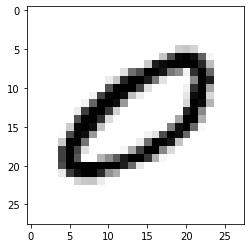

LABEL: 0
Prediction of lr_cv: 5
Prediction of best_SVM: 0


In [35]:
pred_lr = lr_cv.predict(X_test) #Predict the values in the test data with the LR model
wrong_pred_lr = pred_lr != y_test #Get an array of booleans where True means a pattern was misclassified by LR

pred_best_SVM = best_SVM.predict(X_test) #Predict the values in the test data by using the best SVM (rbf) model
right_pred_SVM = pred_best_SVM == y_test #Get an array of booleans where True means a pattern was correctly classified by SVM

#Do the intersection between and keep only the patterns that have a True in the same position (therefore the i-th pattern was misclassified by LR and correctly classified by SVM)
right_SVM_wrong_lr = np.logical_and(right_pred_SVM, wrong_pred_lr)
#Get the indices of the positions in which you have True (the instances that we're looking for)
right_SVM_wrong_lr_indices = [i for i, x in enumerate(right_SVM_wrong_lr) if x]

#Plot the digit for any index inside the vector just obtained
plot_digit(X_test, y_test, right_SVM_wrong_lr_indices[0])
print("Prediction of lr_cv:", pred_lr[right_SVM_wrong_lr_indices[0]])
print("Prediction of best_SVM:", pred_best_SVM[right_SVM_wrong_lr_indices[0]])

## More data
Now let's do the same but using 1000 data points for training. 

## TO DO 6
Repeat the entire analysis above using 1000 samples. Of course you can copy the code from above (but no need to copy markdown comments).

In [36]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 1000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts = True)

#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [1, 10, 100]}

#run linear SVM
linear_SVM = SVC(kernel='linear')

#find best model using 5-fold CV
#and train it using all the training data

#Using GridSearchCV:
grid_linear_1000 = GridSearchCV(estimator=linear_SVM, param_grid=parameters, cv=5)
grid_linear_1000.fit(X_train, y_train)

print ('RESULTS FOR LINEAR KERNEL\n')

print("Best parameters set found:")
print(grid_linear_1000.best_params_)

print("Score with best parameters:")
print(grid_linear_1000.best_score_)

print("\nAll scores on the grid:")
print(grid_linear_1000.cv_results_['mean_test_score'])

# parameters for poly with degree 2 kernel
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with poly of degree 2 kernel
poly2_SVM = SVC(kernel='poly',degree=2)

# ADD CODE: DO THE SAME AS ABOVE FOR POLYNOMIAL KERNEL WITH DEGREE=2
#find best model using 5-fold CV
#and train it using all the training data

#Using now GridSearchCV to see a different approach
grid_poly2_1000 = GridSearchCV(estimator=poly2_SVM, param_grid=parameters, cv=5)
grid_poly2_1000.fit(X_train, y_train)

print ('\nRESULTS FOR POLY DEGREE=2 KERNEL\n')

print("Best parameters set found:")
print(grid_poly2_1000.best_params_)

print("Score with best parameters:")
print(grid_poly2_1000.best_score_)

print("\nAll scores on the grid:")
print(grid_poly2_1000.cv_results_['mean_test_score'])

# parameters for rbf SVM
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with rbf kernel
rbf_SVM = SVC(kernel='rbf')
# ADD CODE: DO THE SAME AS ABOVE FOR RBF KERNEL
#find best model using 5-fold CV
#and train it using all the training data

grid_rbf_1000 = GridSearchCV(estimator=rbf_SVM, param_grid=parameters, cv=5)
grid_rbf_1000.fit(X_train, y_train)

print ('\nRESULTS FOR rbf KERNEL\n')

print("Best parameters set found:")
print(grid_rbf_1000.best_params_)

print("Score with best parameters:")
print(grid_rbf_1000.best_score_)

print("\nAll scores on the grid:")
print(grid_rbf_1000.cv_results_['mean_test_score'])

#get training and test error for the best SVM model from CV
best_SVM_1000 = rbf_SVM

# fit the model on the entire training set
# ADD CODE
best_SVM_1000.fit(X_train, y_train)

#get the training and test error
training_error_best_1000 = 1. - best_SVM_1000.score(X_train,y_train)
test_error_best_1000 = 1. - best_SVM_1000.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error_best_1000)
print ("Best SVM test error: %f" % test_error_best_1000)

from sklearn import linear_model

lr = linear_model.LogisticRegression()
# fit the model on the training data
lr.fit(X_train, y_train)

#compute training and test error for model above
training_error_lr_1000 = 1 - lr.score(X_train, y_train)
test_error_lr_1000 = 1 - lr.score(X_test, y_test)

print ("Best logistic regression training error: %f" % training_error_lr_1000)
print ("Best logistic regression test error: %f" % test_error_lr_1000)

#logistic regression with 5-fold CV: you can use use linear_model.LogisticRegressionCV
# use 5-fold CV to find the best choice of the parameter, than train
# the model on the entire training set
lr_cv = linear_model.LogisticRegressionCV(cv=5)
lr_cv.fit(X_train, y_train)
training_error_cv_1000 = 1 - lr_cv.score(X_train, y_train)
test_error_cv_1000 = 1 - lr_cv.score(X_test, y_test)

print ("Best logistic regression training error with CV: %f" % training_error_cv_1000)
print ("Best logistic regression test error with CV: %f" % test_error_cv_1000)

Labels and frequencies in training dataset: 
RESULTS FOR LINEAR KERNEL

Best parameters set found:
{'C': 1}
Score with best parameters:
0.867

All scores on the grid:
[0.867 0.867 0.867]

RESULTS FOR POLY DEGREE=2 KERNEL

Best parameters set found:
{'C': 10, 'gamma': 0.01}
Score with best parameters:
0.899

All scores on the grid:
[0.877 0.897 0.897 0.899 0.897 0.897 0.897 0.897 0.897]

RESULTS FOR rbf KERNEL

Best parameters set found:
{'C': 10, 'gamma': 0.01}
Score with best parameters:
0.9059999999999999

All scores on the grid:
[0.896 0.615 0.117 0.906 0.65  0.12  0.906 0.65  0.12 ]
Best SVM training error: 0.016000
Best SVM test error: 0.087478


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best logistic regression training error: 0.000000
Best logistic regression test error: 0.131101


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Best logistic regression training error with CV: 0.006000
Best logistic regression test error with CV: 0.129478


## TO DO 7

Let us print the data from both experiments to do a comparison:

In [37]:
from tabulate import tabulate
data=[["Linear SVM", scores[best_parameter_index], grid_linear_1000.best_score_],
      ["Polynomial-2 SVM", grid_poly2.best_score_, grid_poly2_1000.best_score_],
      ["Rbf SVM", grid_rbf.best_score_, grid_rbf_1000.best_score_]]
col_names = ["SVM","500 samples validation score","1000 samples validation score"]

print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))
print("\n")

data = [["Best (rbf) SVM", test_error_best, test_error_best_1000, training_error_best, training_error_best_1000],
      ["Logistic Regression", test_error_lr, test_error_lr_1000, training_error_lr, training_error_lr_1000],
      ["Logistic Regression CV", test_error_cv, test_error_cv_1000, training_error_cv, training_error_cv_1000]]

col_names = ["Model", "500 samples\n\033[1mtest\033[0m error", "1000 samples\n\033[1mtest\033[0m error", "500 samples\n\033[1mtraining\033[0m error", "1000 samples\n\033[1mtraining\033[0m error"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒══════════════════╤════════════════════════════════╤═════════════════════════════════╕
│ SVM              │   500 samples validation score │   1000 samples validation score │
╞══════════════════╪════════════════════════════════╪═════════════════════════════════╡
│ Linear SVM       │                          0.864 │                           0.867 │
├──────────────────┼────────────────────────────────┼─────────────────────────────────┤
│ Polynomial-2 SVM │                          0.858 │                           0.899 │
├──────────────────┼────────────────────────────────┼─────────────────────────────────┤
│ Rbf SVM          │                          0.88  │                           0.906 │
╘══════════════════╧════════════════════════════════╧═════════════════════════════════╛


╒════════════════════════╤═══════════════╤════════════════╤══════════════════╤══════════════════╕
│ Model                  │   500 samples │   1000 samples │      500 samples │     1000 samples │
│         

We can see from the results reported above that by increasing the size of the training set we have an improvement of the estimate of the generalization error on all the models considered.

### Observations on SVMs
For what concerns SVMs, Rbf remains the best model overall, but the polynomial of degree 2 SVM now outperforms the linear SVM by increasing the data.
This is due to the fact that data don't follow a linear trend and are instead better classified by some curve. Since we have 1000 samples, we have a better representation of our data distribution and the polynomial SVM can better understand how to separate the data.

### Observations on LR
As we were expecting, the training error, once we pick a training set which has more instances than the number of features, became worse than the one with had before (i.e. 0).
Let us look at the non-zero coefficients in our model:

In [38]:
for x in range(len(lr_cv.coef_)) : print("hyperplane", x, ":", np.count_nonzero(lr_cv.coef_[x]), "nonzero parameters")

hyperplane 0 : 618 nonzero parameters
hyperplane 1 : 618 nonzero parameters
hyperplane 2 : 618 nonzero parameters
hyperplane 3 : 618 nonzero parameters
hyperplane 4 : 618 nonzero parameters
hyperplane 5 : 618 nonzero parameters
hyperplane 6 : 618 nonzero parameters
hyperplane 7 : 618 nonzero parameters
hyperplane 8 : 618 nonzero parameters
hyperplane 9 : 618 nonzero parameters


In this case, having more instances than features, I dare to say that it *may* not be possible (this depends on the data we pick in our training set) to find a hyperplane that perfectly classifies the data.
Anyway, the model still performs a selection of the features: I guess that some pixels (e.g. the one on the borders) are not relevant for the classification and are, therefore, ignored to avoid an overly complex model.

### Considerations SVMs against LR
We can observe a slight improvement of the performance of the generalization error for all the models considered.
However, the SVM trained with rbf as kernel still outperforms the Logistic Regression model.
The reason for this was already explained in the paragraph above.
The model are working fairly good: we have both good training and generalization error.

### Considerations on errors between LR and SVM:
Since SVM performs better than LR, let us look at where the majority of the misclassifications done by LR come from.
We are going to plot a confusion matrix that will tell us which are the most critical boundaries between classes, i.e. which are the patterns correctly classified by SVM that instead are wrongly recognized by LR.

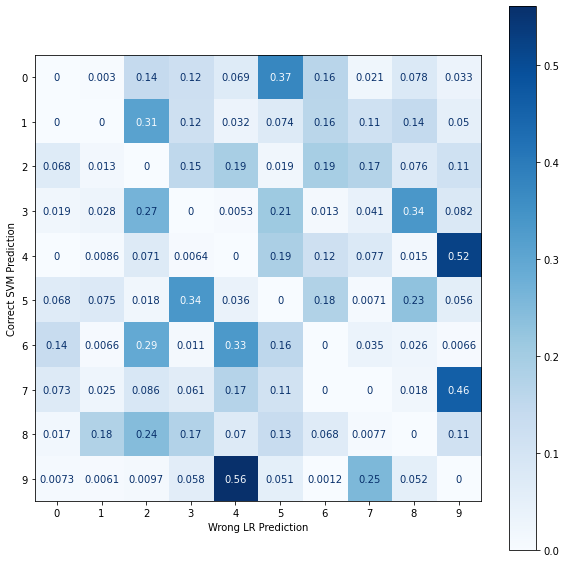

In [39]:
pred_lr = lr_cv.predict(X_test)
wrong_pred_lr = pred_lr != y_test

pred_best_SVM = best_SVM.predict(X_test)
right_pred_SVM = pred_best_SVM == y_test

right_SVM_wrong_lr = right_pred_SVM == wrong_pred_lr
right_SVM_wrong_lr_indices = [i for i, x in enumerate(right_SVM_wrong_lr) if x]

# Define the confusion matrix, normalized, with the SVM correct predictions as "true" labels and the ones done by LR as, simply, predictions.
cm = sklearn.metrics.confusion_matrix(pred_best_SVM[right_SVM_wrong_lr_indices], pred_lr[right_SVM_wrong_lr_indices], normalize='true')

disp = sklearn.metrics.ConfusionMatrixDisplay(cm)

fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax = ax, cmap='Blues')

disp.ax_.set(xlabel='Wrong LR Prediction',
             ylabel='Correct SVM Prediction')
plt.show()

### Comments on the result of the confusion matrix

As we can see from the reported confusion matrix (actually these results may change based on how we pick the training set, but overall these are the most occurring possibilities):
- 9 is wrongly classified as 4 by LR in many cases
- 4, 7 get instead confused by a 9 oftentimes by LR
- 0, 3 get wrongly identified as a 5 by LR.

As we can see, many problems arise with 4 and 9: this means that the instances belonging to class 4 and 9 are relatively close to each other.
First of all, LR uses a hyperplane as separation surface and it assumes that the data are linearly separable. The fact that the data are separated by a hyperplane is a strong assumption, which may not apply to our dataset.
On the other hand, SVM with RBF kernel projects the data into a space where the dot product is a better representation of the similarity between the figures 4 and 9: this allows us to separate the data through a more complex surface, which results in higher performance.
Moreover, SVM tries not only to separate the data through some surface, but also to optimize the margin (which is not done by LR, which only looks for any separating hyperplane). This may result also in some ignored instances that lead to a larger margin.